In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

In [ ]:
#in clustering you dont have y(target or output)
#clustering is Unsupervised learning

In [9]:
df = pd.read_csv('H:\Machine Learning Module\Data sets\AirlinesCluster.csv')

In [10]:
df.head()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
0,28143,0,174,1,0,0,7000
1,19244,0,215,2,0,0,6968
2,41354,0,4123,4,0,0,7034
3,14776,0,500,1,0,0,6952
4,97752,0,43300,26,2077,4,6935


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 7 columns):
Balance            3999 non-null int64
QualMiles          3999 non-null int64
BonusMiles         3999 non-null int64
BonusTrans         3999 non-null int64
FlightMiles        3999 non-null int64
FlightTrans        3999 non-null int64
DaysSinceEnroll    3999 non-null int64
dtypes: int64(7)
memory usage: 218.8 KB


In [7]:
df.columns

Index(['Balance', 'QualMiles', 'BonusMiles', 'BonusTrans', 'FlightMiles',
       'FlightTrans', 'DaysSinceEnroll'],
      dtype='object')

In [8]:
df.describe()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
count,3.999000e+03,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,7.360133e+04,144.114529,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1.007757e+05,773.663804,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1.852750e+04,0.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,4.309700e+04,0.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,9.240400e+04,0.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,1.704838e+06,11148.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000


In [38]:
#creating a duplicate dataset to work on
df1 = df
df1.head()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll,cluster
0,28143,0,174,1,0,0,7000,3
1,19244,0,215,2,0,0,6968,3
2,41354,0,4123,4,0,0,7034,3
3,14776,0,500,1,0,0,6952,3
4,97752,0,43300,26,2077,4,6935,1


In [12]:
#scaling is required because we data has values in thousands and zero i.e if data is  of above type then we apply scaling

#standardize the data to normal distribution
#
from sklearn import preprocessing
df1_standardized = preprocessing.scale(df1)
df1_standardized = pd.DataFrame(df1_standardized)

[27993.0, 21986.776166504049, 18131.370977425184, 15490.756814787495, 13515.207717858802, 12157.9018951619, 11044.404221804278, 10110.509525072524, 9472.7259768789572, 8925.6438457881122]


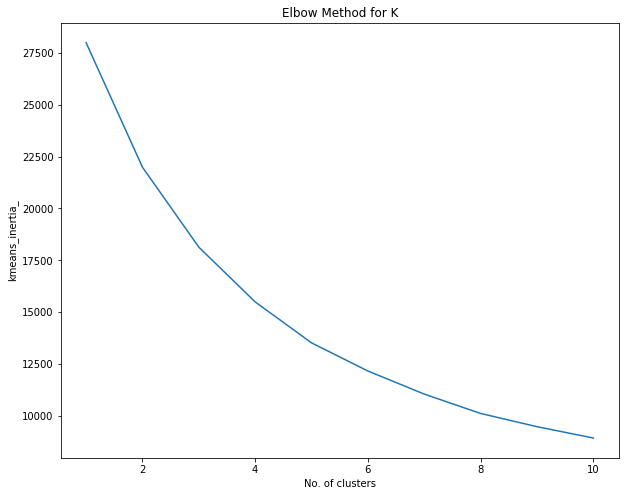

In [25]:
#find the  appropriate value of K - by Elbow method

plt.figure(figsize=(10,8))
wcss =[] #empty list
for i in range(1,11):
    kmeans = KMeans(n_clusters=i , init= 'k-means++' , random_state = 42)
    kmeans.fit(df1_standardized)
    wcss.append(kmeans.inertia_)
print(wcss)    
plt.plot(range(1,11),wcss)
plt.title('Elbow Method for K')
plt.xlabel('No. of clusters')
plt.ylabel('kmeans_inertia_')

plt.show()

In [40]:
# K means algorithm
#fitting K-means to the dataset

kmeans = KMeans(n_clusters=5 , init= 'k-means++' , random_state = 42)
kmeans.fit(df1_standardized)
y_kmeans = kmeans.fit_predict(df1_standardized)
y_kmeans
#beginning of the cluster numbering with 1 instead of 0
y_kmeans1 = y_kmeans
y_kmeans1 = y_kmeans+1
#New dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
#Adding cluster to the dataset1
df1['cluster']=cluster
#means of clusters
kmeans_mean_cluster = pd.DataFrame(round(df1.groupby('cluster').mean(),1))
kmeans_mean_cluster

#IN output 152724.4 is the mean value of balance for cluter 1 likewise for all columns

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
cluster,,,,,,,
1,152724.4,77.9,50999.4,21.3,479.4,1.5,4912.2
2,116472.4,5636.3,19804.3,12.5,963.0,2.9,3950.6
3,57410.4,53.4,8738.5,9.1,213.4,0.6,5828.1
4,191736.3,471.6,33093.3,28.4,5763.1,16.8,4666.4
5,38180.1,39.4,6734.2,7.6,180.0,0.6,2283.7


In [41]:
kmeans.predict([[152724.4,77.9,50999.4,21.3,479.4,1.5,4912.2]])

array([3])

In [42]:
print(kmeans.n_clusters) #number of clusters 
print(kmeans.cluster_centers_) #centroids values

5
[[ 0.78343265 -0.08574292  1.40210526  1.00989063  0.01338988  0.02146742
   0.38290995]
 [ 0.42546416  7.09987688  0.11013129  0.09826017  0.35926311  0.40006234
  -0.08132353]
 [-0.16068347 -0.11732511 -0.34811688 -0.26055899 -0.1761986  -0.19190054
   0.82791104]
 [ 1.17240389  0.42330125  0.66044906  1.74481144  3.78781998  4.05928363
   0.2653201 ]
 [-0.35136715 -0.13527999 -0.43229738 -0.41376155 -0.19993373 -0.21556336
  -0.88871343]]


# Hierarchical Clustering

In [45]:
df2_standardized = df1_standardized
#Dendogram
from scipy.cluster.hierarchy import dendrogram,linkage
import numpy as np
#method = 'ward' uses the ward variance minimization algo.
#s and t are new centroids

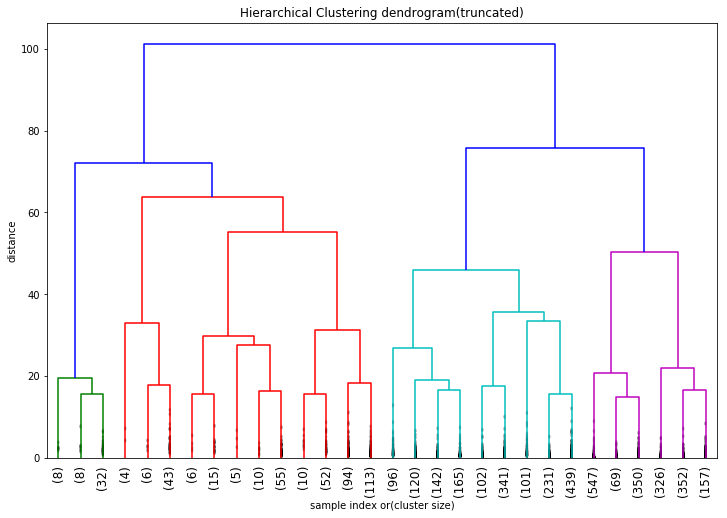

In [59]:
%matplotlib inline
np.set_printoptions(precision= 5 , suppress=True) #suppress scientify
#creating scientific float notation
#method = 'ward' uses the ward variance minimization algo.
H_cluster = linkage(df2_standardized,method='ward')
plt.figure(figsize=(12,8))
plt.title('Hierarchical Clustering dendrogram(truncated)')
plt.xlabel('sample index or(cluster size)')
plt.ylabel('distance')

#Graphical representation of H_clustering
# Z: H_cluster - linkage N-D array of histogram
#truncate_mode : 
#'lastp'-The last p non-singleton formed in the linkage are the only non-leaf nodes in the linkage
# search on google - 'dendrogram scipy' 
# level= No more than p levels of the dendrogram tree are displayed. This corresponds to Mathematica(TM) behavior.
dendrogram(
          Z = H_cluster,
          truncate_mode='lastp',  #show only the last p merged clusters  #lastp/level/none
          leaf_rotation = 90., #
          leaf_font_size=12.,
          show_contracted=True #to get a distribution impression in truncated branches
    
)
plt.show()

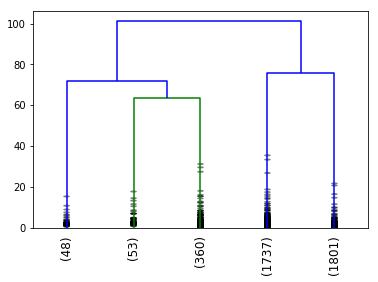

In [54]:
dendrogram(
          H_cluster,
          truncate_mode='lastp',  #show only the last p merged clusters  
          p=5,#number of clusters
          leaf_rotation = 90., #
          leaf_font_size=12.,
          show_contracted=True #to get a distribution impression in truncated branches
    
)
plt.show()

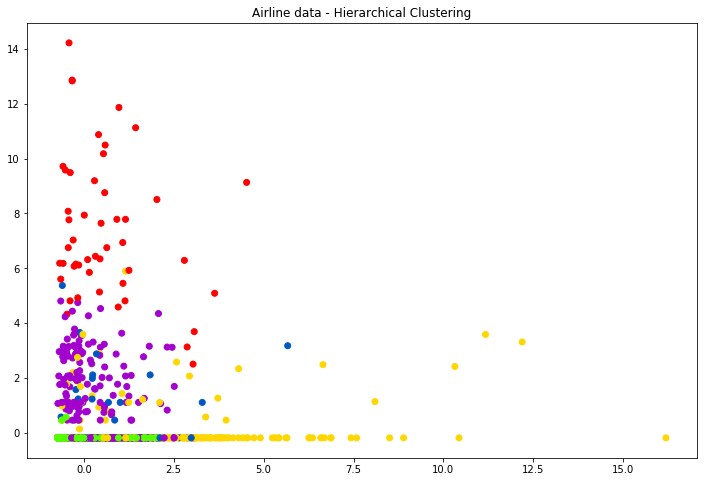

In [55]:
#Assigning the clusters and plotting the observations as per hierarchy
from scipy.cluster.hierarchy import fcluster
k=5
cluster_2 = fcluster(H_cluster,k,criterion='maxclust')
cluster_2[0:30:,]
plt.figure(figsize=(12,8))
plt.scatter(df2_standardized.iloc[:,0],df2_standardized.iloc[:,1],c=cluster_2,cmap='prism')
#plot points with cluster dependent colors
plt.title('Airline data - Hierarchical Clustering')
plt.show()